# Crime Analysis in Chicago (2001 vs. 2018)

## Descriptive Data Analysis

### Setup

In [1]:
# Imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (25, 10) #increase figure size

In [2]:
"""
# Read in datasets
df_2001_2004 = pd.read_csv("data/Chicago_Crimes_2001_to_2004.csv", error_bad_lines=False)
df_2005_2007 = pd.read_csv("data/Chicago_Crimes_2005_to_2007.csv", error_bad_lines=False)
df_2008_2011 = pd.read_csv("data/Chicago_Crimes_2008_to_2011.csv", error_bad_lines=False)
df_2012_2017 = pd.read_csv("data/Chicago_Crimes_2012_to_2017.csv", error_bad_lines=False)

# Create dataframes per year
df_2001 = df_2001_2004[df_2001_2004['Year'] == 2001]
df_2002 = df_2001_2004[df_2001_2004['Year'] == 2002]
df_2003 = df_2001_2004[df_2001_2004['Year'] == 2003]
df_2004 = df_2001_2004[df_2001_2004['Year'] == 2004]

df_2005 = df_2005_2007[df_2005_2007['Year'] == 2005]
df_2006 = df_2005_2007[df_2005_2007['Year'] == 2006]
df_2007 = df_2005_2007[df_2005_2007['Year'] == 2007]

df_2008 = df_2008_2011[df_2008_2011['Year'] == 2008]
df_2009 = df_2008_2011[df_2008_2011['Year'] == 2009]
df_2010 = df_2008_2011[df_2008_2011['Year'] == 2010]
df_2011 = df_2008_2011[df_2008_2011['Year'] == 2011]

df_2012 = df_2012_2017[df_2012_2017['Year'] == 2012]
df_2013 = df_2012_2017[df_2012_2017['Year'] == 2013]
df_2014 = df_2012_2017[df_2012_2017['Year'] == 2014]
df_2015 = df_2012_2017[df_2012_2017['Year'] == 2015]
df_2016 = df_2012_2017[df_2012_2017['Year'] == 2016]
df_2017 = df_2012_2017[df_2012_2017['Year'] == 2017]

# List with all datasets
export_datasets = [df_2001, df_2002, df_2003, df_2004, df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017]

# Export dataframes into csv files per year
year = 2001
for dataset in export_datasets:
    name = "data/crime_" + str(year) + ".csv"
    cols = dataset.columns
    #df = pd.read_csv(name, )
    dataset.to_csv(name, index=False)
    #dataset.to_csv(name, index=False)
    year += 1

# Loop through csv files and resave to fix index column
year = 2001
for dataset in export_datasets:
    name = "crime_" + str(year) + ".csv"
    df = pd.read_csv("data/" + name).drop(dataset.columns[0], axis=1)
    df.to_csv("data/" + name, index=0)
    year += 1
""";

In [3]:
# Load datasets from beginning, middle, and end years
df_2003 = pd.read_csv("data/crime_2003.csv")
df_2003.name = "Crime in 2003"

df_2007 = pd.read_csv("data/crime_2007.csv")
df_2007.name = "Crime in 2007"

df_2016 = pd.read_csv("data/crime_2016.csv")
df_2016.name = "Crime in 2016"
datasets = [df_2003, df_2007, df_2016]

In [4]:
df_2003.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,935,9.0,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
1,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,2233,22.0,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"
2,4679521,HM216293,03/15/2003 12:00:00 AM,090XX S RACINE AVE,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,False,False,2222,22.0,21.0,73.0,26,1169911.0,1844832.0,2003.0,04/15/2016 08:55:02 AM,41.729712,-87.653159,"(41.729712374, -87.653158513)"
3,4680124,HM282389,01/01/2003 12:00:00 AM,009XX S SPAULDING AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,1134,11.0,24.0,29.0,06,1154521.0,1895755.0,2003.0,04/15/2016 08:55:02 AM,41.869772,-87.708180,"(41.869772159, -87.708180162)"
4,4682244,HM282286,06/05/2003 12:00:00 AM,093XX S WALLACE ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,2223,22.0,21.0,73.0,06,1173946.0,1842903.0,2003.0,04/15/2016 08:55:02 AM,41.724330,-87.638434,"(41.724330486, -87.638434248)"


In [5]:
Latitude=np.array(df_2003['Latitude'])

print("Mean Latitude:       ",Latitude.mean())
print("Min Latitude:       ",Latitude.min())
print("Max Latitude:       ",Latitude.max())
print("Std Latitude:       ",Latitude.std())


Mean Latitude:        nan
Min Latitude:        nan
Max Latitude:        nan
Std Latitude:        nan


## Data cleaning

### Size

In [6]:
for dataset in datasets:
    print("Dataset: {}, Shape: {}".format(dataset.name, dataset.shape))

Dataset: Crime in 2003, Shape: (475913, 22)
Dataset: Crime in 2007, Shape: (621848, 22)
Dataset: Crime in 2016, Shape: (265462, 22)


### Missingness

In [7]:
for dataset in datasets:
    print("Dataset: {}".format(dataset.name))
    print(dataset.isnull().sum())
    print('\n')

Dataset: Crime in 2003
ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description       2
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      19
Community Area            50
FBI Code                   0
X Coordinate            4728
Y Coordinate            4728
Year                       0
Updated On                 0
Latitude                4728
Longitude               4728
Location                4728
dtype: int64


Dataset: Crime in 2007
ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description       5
Arrest                     0
Domestic                   0
Beat       

In [8]:
for dataset in datasets:
    print(f"Dataset name:{dataset.name}")
    print(dataset.duplicated().sum)

Dataset name:Crime in 2003
<bound method Series.sum of 0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
475883    False
475884    False
475885    False
475886    False
475887    False
475888    False
475889    False
475890    False
475891    False
475892    False
475893    False
475894    False
475895    False
475896    False
475897    False
475898    False
475899    False
475900    False
475901    False
475902    False
475903    False
475904    False
475905    False
475906    False
475907    False
475908    False
475909    False
475910    False
4

### Crime per community area (2003, 2007, 2016)

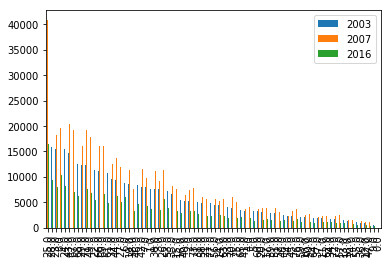

In [9]:
df_areas = pd.DataFrame()
df_areas['2003'] = df_2003['Community Area'].value_counts()
df_areas['2007'] = df_2007['Community Area'].value_counts()
df_areas['2016'] = df_2016['Community Area'].value_counts()
df_areas.plot(kind='bar', rot=90);

## Choropleth

ModuleNotFoundError: No module named 'folium'